In [2]:
%pip install librosa numpy matplotlib > /dev/null 2>&1

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

from transform import *

In [4]:
FIGSAVE = dict(format='svg', bbox_inches='tight')
FIGSAVE

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'serif']

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['mathtext.it'] = 'serif:italic'
plt.rcParams['mathtext.bf'] = 'serif:bold'


# Task 1

## 1. Rectangle function

In [5]:
b = 5
a = 3

A = [3, 3, 6]
B = [3, 6, 3]
Lim = list(map(lambda x: 2*x, B))

size1 = (14*.6, 3*.6)

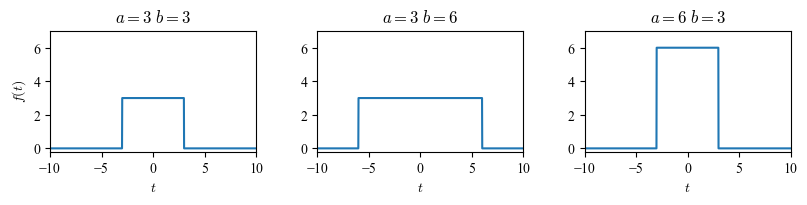

In [6]:
def f1(t:np.ndarray) -> np.ndarray:
    global a, b
    return np.piecewise(t,
        [np.abs(t) <= b],
        [a, 0],

    )

fig, ax = plt.subplots(1, 3, figsize=size1)
ax[0].set_ylabel("$f(t)$")
fig.tight_layout()

for a, b, axx in zip(A,B, ax):
    x = np.linspace(-10, 10, 1000)
    axx.set_xlabel("$t$")
    axx.set_xlim([-10,10])
    axx.set_ylim([-.2,7])
    axx.plot(x, f1(x))
    axx.set_title(f'$a={a}$ $b={b}$')

    

%mkdir -p '../fig/task1/func1/'
fig.savefig(fname='../fig/task1/func1/func.svg', **FIGSAVE)

$ cases(a=3,b=3) $
$ #lhs = 8.603 approx #rhs = 8.590 $

$ cases(a=3,b=6) $
$ #lhs = 17.206 approx #rhs = 17.189 $

$ cases(a=6,b=3) $
$ #lhs = 34.412 approx #rhs = 34.361 $



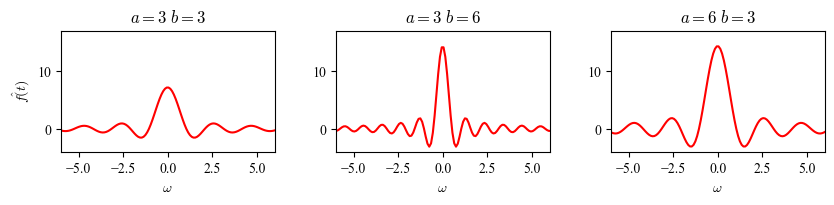

In [7]:
fig, ax = plt.subplots(1, 3, figsize=size1)
ax1, ax2, ax3 = ax

fig.tight_layout()
ax[0].set_ylabel(r"$f\hat (t)$")


for a, b, axx, lim in zip(A, B, ax, Lim):
    omega, fhat = transform(f1, lim=10)
    axx.set_xlabel(r"$\omega$")
    axx.set_xlim([-6,6])
    axx.set_ylim([-4,17])
    axx.plot(omega, np.real(fhat), color='red', label=f'$a={a}$ $b={b}$')
    axx.set_title(f'$a={a}$ $b={b}$')
    

    norm = np.trapezoid(f1(x)**2, x)/(2*np.pi)
    rhs = np.trapezoid(np.abs(fhat)**2, omega) / (2*np.pi)
    
    print(f'$ cases(a={a},b={b}) $')
    print(f'$ #lhs = {norm:.3f} approx #rhs = {rhs:.3f} $')
    print()

fig.savefig(fname='../fig/task1/func1/ft_image.svg', **FIGSAVE)

## Triangle Function

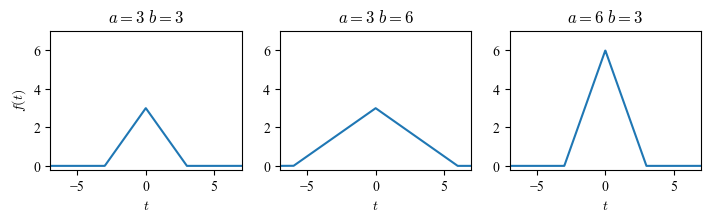

In [8]:
def f2(t: np.ndarray):
    global a, b
    return np.piecewise(t,
        [np.abs(t) <= b],
        [lambda t: a- np.abs(a*t/b)])

fig, ax = plt.subplots(1, 3, figsize=size1)

ax[0].set_ylabel("$f(t)$")

for a, b, axx in zip(A, B, ax):
    axx.set_xlabel("$t$")
    axx.set_title(f'$a={a}$ $b={b}$')
    axx.set_xlim([-7,7])
    axx.set_ylim([-.2,7])
    
    x = np.linspace(-7, 7, 1000)
    axx.plot(x, f2(x))

%mkdir -p '../fig/task1/func2/'
fig.savefig(fname='../fig/task1/func2/func.svg', **FIGSAVE)

$ cases(a=3,b=3) $
$ #lhs = 2.865 approx #rhs = 2.865 $

$ cases(a=3,b=6) $
$ #lhs = 5.730 approx #rhs = 5.730 $

$ cases(a=6,b=3) $
$ #lhs = 11.459 approx #rhs = 11.459 $



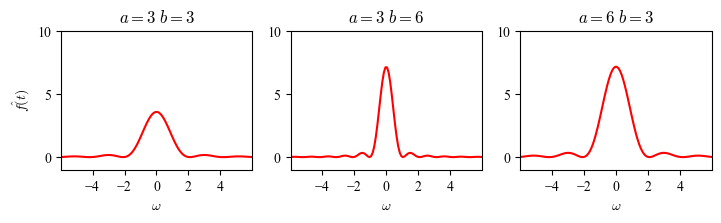

In [9]:
fig, ax = plt.subplots(1, 3, figsize=size1)

ax[0].set_ylabel(r"$f\hat (t)$")

for a, b, axx, lim in zip(A, B, ax, Lim):
    omega, fhat = transform(f2, lim=10)
    axx.set_xlabel(r"$\omega$")
    axx.set_xlim([-6,6])
    axx.set_ylim([-1,10])
    axx.set_xticks(np.arange(-4,6,2))

    axx.plot(omega, np.real(fhat), color='red')
    axx.set_title(f'$a={a}$ $b={b}$')
    
    norm = np.trapezoid(f2(x)**2, x)/ (2*np.pi)
    rhs = np.trapezoid(np.abs(fhat)**2, omega) / (2*np.pi)
    
    print(f'$ cases(a={a},b={b}) $')
    print(f'$ #lhs = {norm:.3f} approx #rhs = {rhs:.3f} $')
    print()
    
fig.savefig('../fig/task1/func2/ft_image.svg', **FIGSAVE)

## Hyperbolic Sine

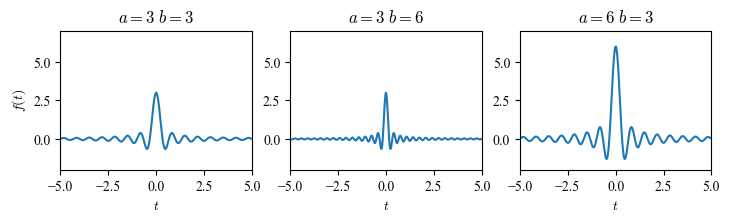

In [10]:
f3 = lambda t: a*np.sinc(b*t)

fig, ax = plt.subplots(1, 3, figsize=size1)
ax[0].set_ylabel("$f(t)$")

lim = 5
for a, b, axx in zip(A,B, ax):
    x = np.linspace(-2*lim, 2*lim, 1000)
    axx.set_xlim([-lim, lim])
    axx.set_ylim([-2, 7])

    axx.set_xlabel("$t$")
    axx.plot(x, f3(x))
    axx.set_title(f'$a={a}$ $b={b}$')
%mkdir -p '../fig/task1/func3/'
fig.savefig(fname='../fig/task1/func3/func.svg', **FIGSAVE)

$ cases(a=3,b=3) $
$ #lhs = 0.476 approx #rhs = 0.477 $

$ cases(a=3,b=6) $
$ #lhs = 0.238 approx #rhs = 0.239 $

$ cases(a=6,b=3) $
$ #lhs = 1.903 approx #rhs = 1.907 $



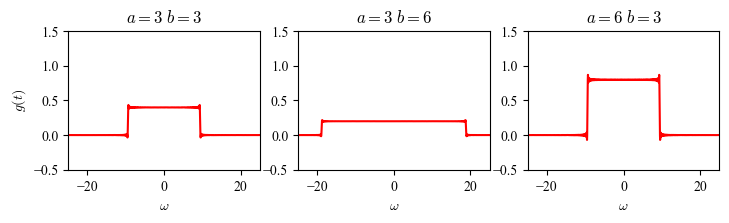

In [11]:
fig, ax = plt.subplots(1, 3, figsize=size1)
ax[0].set_ylabel("$g(t)$")

lim = 25
for a, b, axx in zip(A, B, ax):
    omega, fhat = transform(f3, lim)

    axx.set_xlim([-lim, lim])
    axx.set_ylim([-.5, 1.5])

    axx.set_xlabel(r"$\omega$")
    axx.plot(omega, np.real(fhat), color='red')
    axx.set_title(f'$a={a}$ $b={b}$')

    norm = np.trapezoid(f3(x)**2, x)/(2*np.pi)
    rhs = np.trapezoid(np.abs(fhat)**2, omega) / (2*np.pi)

    print(f'$ cases(a={a},b={b}) $')
    print(f'$ #lhs = {norm:.3f} approx #rhs = {rhs:.3f} $')
    print()

fig.savefig('../fig/task1/func3/ft_image.svg', **FIGSAVE)

## Gauss Function

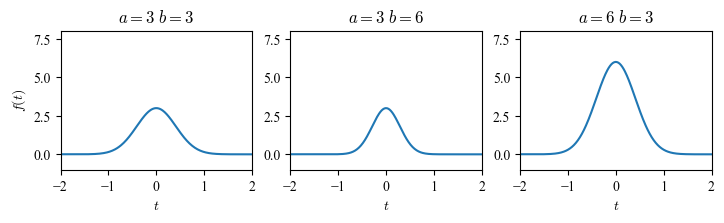

In [12]:
f4 = lambda t: a*np.exp(-b*t*t)

fig, ax = plt.subplots(1, 3, figsize=size1)

ax[0].set_ylabel("$f(t)$")


lim = 2
for a, b, axx in zip(A,B, ax):
    x = np.linspace(-7, 7, 1000)
    axx.set_xlim([-lim, lim])
    axx.set_ylim([-1, 8])

    axx.set_xlabel("$t$")
    axx.plot(x, f4(x))
    axx.set_title(f'$a={a}$ $b={b}$')
    
%mkdir -p '../fig/task1/func4/'
fig.savefig(fname='../fig/task1/func4/func.svg', **FIGSAVE)

$ cases(a=3,b=3) $
$ #lhs = 1.036 approx #rhs = 1.036 $

$ cases(a=3,b=6) $
$ #lhs = 0.733 approx #rhs = 0.733 $

$ cases(a=6,b=3) $
$ #lhs = 4.146 approx #rhs = 4.146 $



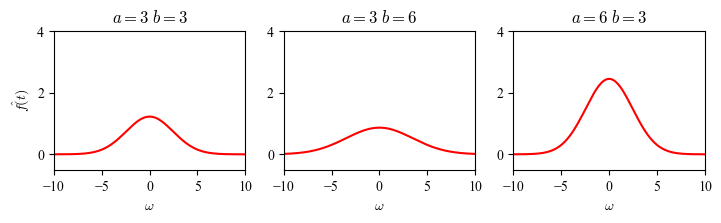

In [13]:
fig, ax = plt.subplots(1, 3, figsize=size1)

ax[0].set_ylabel(r"$f\hat (t)$")

for a, b, axx in zip(A, B, ax):
    omega, fhat = transform(f4, lim=15)

    axx.set_xlim([-10, 10])
    axx.set_ylim([-.5, 4])
    axx.set_xlabel(r"$\omega$")

    axx.plot(omega, np.real(fhat), color='red')
    axx.set_title(f'$a={a}$ $b={b}$')

    norm = np.trapezoid(f4(x)**2, x)/(2*np.pi)
    rhs = np.trapezoid(np.abs(fhat)**2, omega) / (2*np.pi)

    print(f'$ cases(a={a},b={b}) $')
    print(f'$ #lhs = {norm:.3f} approx #rhs = {rhs:.3f} $')
    print()

fig.savefig('../fig/task1/func4/ft_image.svg', **FIGSAVE)

## Decay with Absolute Value

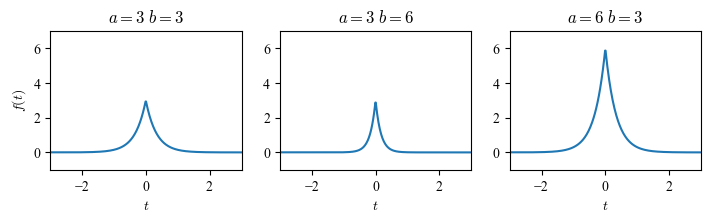

In [14]:
f5 = lambda t: a*np.exp(-b*np.abs(t))

fig, ax = plt.subplots(1, 3, figsize=size1)
ax[0].set_ylabel("$f(t)$")

lim = 3
for a, b, axx in zip(A,B, ax):
    x = np.linspace(-7, 7, 1000)
    axx.set_xlim([-lim, lim])
    axx.set_ylim([-1, 7])

    axx.set_xlabel("$t$")
    axx.plot(x, f5(x))
    axx.set_title(f'$a={a}$ $b={b}$')
%mkdir -p '../fig/task1/func5/'
fig.savefig(fname='../fig/task1/func5/func.svg', **FIGSAVE)

$ cases(a=3,b=3) $
$ #lhs = 0.477 approx #rhs = 0.477 $

$ cases(a=3,b=6) $
$ #lhs = 0.238 approx #rhs = 0.238 $

$ cases(a=6,b=3) $
$ #lhs = 1.909 approx #rhs = 1.909 $



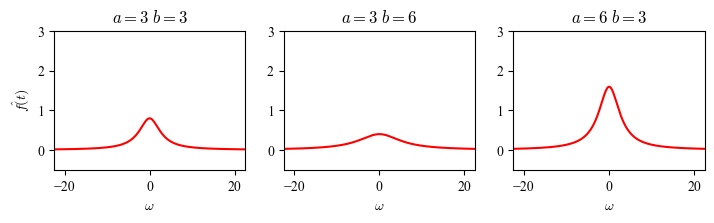

In [15]:
omega5, freq5 = transform(f5, lim*2)

fig, ax = plt.subplots(1, 3, figsize=size1)
ax1, ax2, ax3 = ax

ax[0].set_ylabel(r"$f\hat (t)$")

lim = 15
for a, b, axx in zip(A, B, ax):
    omega, fhat = transform(f5, lim=15)
    axx.set_xlim([-1.5*lim, 1.5*lim])
    axx.set_ylim([-.5, 3])

    axx.set_xlabel(r"$\omega$")
    axx.plot(omega, np.real(fhat), color='red')
    axx.set_title(f'$a={a}$ $b={b}$')

    norm = np.trapezoid(f5(x)**2, x) / (2*np.pi)

    rhs = np.trapezoid(np.abs(fhat)**2, omega) / (2*np.pi)

    print(f'$ cases(a={a},b={b}) $')
    print(f'$ #lhs = {norm:.3f} approx #rhs = {rhs:.3f} $')
    print()

fig.savefig('../fig/task1/func5/ft_image.svg', **FIGSAVE)

# Task 2

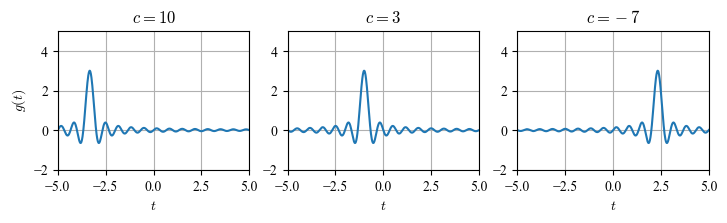

In [16]:
C = [10,3,-7]

def g(t, c):
    return 3*np.sinc(3*t+c)

fig, ax = plt.subplots(1, 3, figsize=size1)
ax[0].set_ylabel("$g(t)$")


lim = 5
for c, axx in zip(C, ax):
    x = np.linspace(-lim, lim*2, 1000)
    y = g(x, c)
    
    axx.grid()
    if c == -15:
        axx.set_xlim([-lim+2, lim+2])
    else:
        axx.set_xlim([-lim, lim])
    axx.set_ylim([-2, 5])
    axx.set_xlabel("$t$")

    axx.plot(x, y)
    
    if c == 2*np.pi:
        c = r'2\pi'
    axx.set_title(f'$c = {c}$')

%mkdir -p '../fig/task2'
fig.savefig(fname='../fig/task2/func.svg', **FIGSAVE)


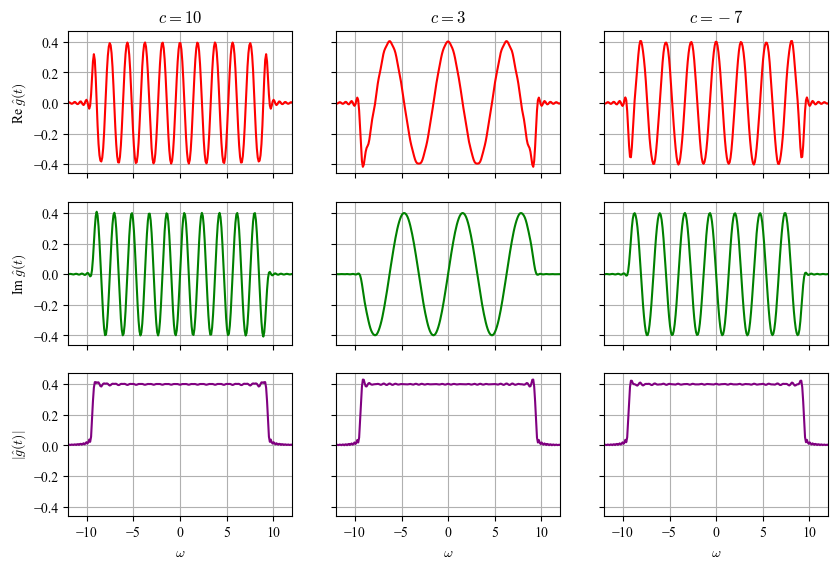

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(14*.7,9*.7), squeeze=True, sharex=True, sharey=True)

for i in range(3):
    ax[2, i].set_xlabel(r"$\omega$")

ax[0, 0].set_ylabel(r'Re $\hat g (t)$')
ax[1, 0].set_ylabel(r'Im $\hat g (t)$')
ax[2, 0].set_ylabel(r'$|\hat g(t)|$')

for i in range(3):
    ax[0, i].set_title(f'$c = {C[i]}$')


for i, c in zip(range(3), C):
    omega, fhat = transform(lambda t: g(t, c), lim=10, n_points=3000)

    for j in range(3):
        ax[j, i].grid()
        ax[j, i].set_xlim([-12, 12])
    

    ax[0, i].plot(omega, np.real(fhat), color='red')
    ax[1, i].plot(omega, np.imag(fhat), color='green')
    ax[2, i].plot(omega, np.abs(fhat) , color='purple')

fig.savefig(fname='../fig/task2/ft_image.svg', **FIGSAVE)

# Task 3

Audio duration: 4.67 seconds
Sampling rate: 22050 Hz


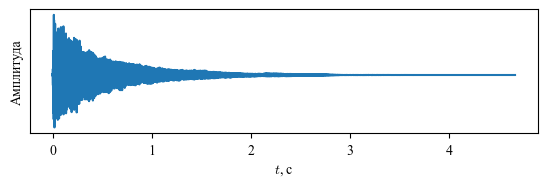

In [18]:
mp3path = '../sup/12.mp3'

# Load the audio file
y, sr = librosa.load(mp3path)

# Print basic information
print(f"Audio duration: {len(y)/sr:.2f} seconds")
print(f"Sampling rate: {sr} Hz")

# Plot waveform
plt.figure(figsize=(6, 2))
plt.plot(np.linspace(0, len(y)/sr, len(y)), y)
plt.xlabel('$t$, с')
plt.ylabel('Амплитуда')
plt.tight_layout()
plt.yticks([])

%mkdir -p '../fig/task3/'
plt.savefig(fname='../fig/task3/wave.svg', **FIGSAVE)



In [19]:
y2 = y[::5]
n2 = len(y2)
sr2 = sr//5

t = np.linspace(0, len(y2)/sr2, len(y2))
omega = np.linspace(0, sr2//2, n2//2)
Y = np.trapezoid(y2 * np.exp(-1j * 2*np.pi*omega[:,np.newaxis] * t), dx=1/sr2, axis=-1)

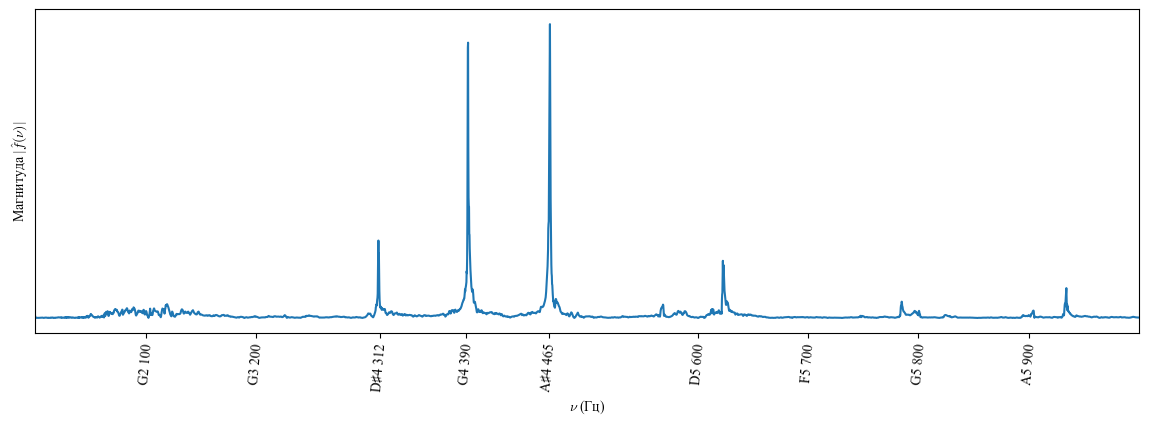

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(omega, np.abs(Y))

plt.xlabel(r'$\nu$ (Гц)')
plt.ylabel(r'Магнитуда $|\hat f (\nu)|$')
plt.tight_layout()

ticks = np.array([100, 200, 312, 390, 465, 600, 700, 800, 900])
np.sort(ticks)

labels = [librosa.hz_to_note(freq) + ' ' + str(int(freq)) for freq in ticks]

plt.xticks(ticks, rotation=85, labels=labels)
plt.yticks([])

plt.xlim([0,1000])
plt.margins(x=0, y=0.05)

plt.savefig(fname='../fig/task3/ft_image.svg', **FIGSAVE)